In [127]:
import numpy as np
import backtrader as bt
import yfinance as yf
import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [128]:
df = yf.download('X', start='2020-01-01', multi_level_index=False)
df.head()

[*********************100%***********************]  1 of 1 completed


,Close,High,Low,Open,Volume
Date,,,,,
2020-01-02,10.480042,11.235536,10.383185,11.187107,18748300
2020-01-03,10.402558,10.547846,10.266958,10.315386,10491200
2020-01-06,10.450990,10.654392,10.305703,10.363817,9685400
2020-01-07,10.780303,10.857789,10.489729,10.489729,11908800
2020-01-08,10.751249,10.915908,10.673763,10.780306,9925100


In [129]:
df.tail()

,Close,High,Low,Open,Volume
Date,,,,,
2025-05-28,53.340000,53.470001,52.700001,52.860001,11972100
2025-05-29,53.230000,53.599998,52.880001,53.200001,7469500
2025-05-30,53.820000,54.029999,52.840000,53.000000,19165300
2025-06-02,53.529999,53.900002,53.180000,53.450001,17534400
2025-06-03,53.759998,53.830002,53.240002,53.599998,7613300


In [130]:
data = bt.feeds.PandasData(dataname=df)

In [131]:
cerebro = bt.Cerebro()

In [132]:
class PrintClose(bt.Strategy):
	def __init__(self):
		self.dataclose = self.datas[0].close
	def log(self, txt):
		dt=self.datas[0].datetime.date(0)
		print('{0}, {1}'.format(dt.isoformat(), txt))

	def next(self):
		self.log('Close: {0:.2f}'.format(self.dataclose[0]))

In [133]:
class TestStrategy(bt.Strategy):
	def log(self, txt):
		dt=self.datas[0].datetime.date(0)
		print('{0}, {1}'.format(dt.isoformat(), txt))
		
	def __init__(self):
		self.dataclose = self.datas[0].close
	def next(self):
		self.log('Close: {0:.2f}'.format(self.dataclose[0]))

		if self.dataclose[0] < self.dataclose[-1]:
			if self.dataclose[-1] < self.dataclose[-2]:
				self.log('PRE CLOSE: {0:.2f}'.format(self.dataclose[-2]))
				self.log('PRE CLOSE: {0:.2f}'.format(self.dataclose[-1]))
				self.log('BUY CREATE, {0:.2f}'.format(self.dataclose[0]))
				self.buy()

In [134]:
cerebro.adddata(data)
cerebro.addstrategy(TestStrategy)

0

In [135]:
cerebro.broker.setcash(100000.0)

In [136]:
cerebro.broker.getvalue()

100000.0

In [137]:
cerebro.run()

2020-01-02, Close: 10.48
2020-01-03, Close: 10.40
2020-01-03, PRE CLOSE: 53.76
2020-01-03, PRE CLOSE: 10.48
2020-01-03, BUY CREATE, 10.40
2020-01-06, Close: 10.45
2020-01-07, Close: 10.78
2020-01-08, Close: 10.75
2020-01-09, Close: 10.51
2020-01-09, PRE CLOSE: 10.78
2020-01-09, PRE CLOSE: 10.75
2020-01-09, BUY CREATE, 10.51
2020-01-10, Close: 10.38
2020-01-10, PRE CLOSE: 10.75
2020-01-10, PRE CLOSE: 10.51
2020-01-10, BUY CREATE, 10.38
2020-01-13, Close: 10.38
2020-01-14, Close: 10.57
2020-01-15, Close: 10.17
2020-01-16, Close: 10.13
2020-01-16, PRE CLOSE: 10.57
2020-01-16, PRE CLOSE: 10.17
2020-01-16, BUY CREATE, 10.13
2020-01-17, Close: 10.17
2020-01-21, Close: 9.64
2020-01-22, Close: 9.66
2020-01-23, Close: 9.39
2020-01-24, Close: 9.10
2020-01-24, PRE CLOSE: 9.66
2020-01-24, PRE CLOSE: 9.39
2020-01-24, BUY CREATE, 9.10
2020-01-27, Close: 8.80
2020-01-27, PRE CLOSE: 9.39
2020-01-27, PRE CLOSE: 9.10
2020-01-27, BUY CREATE, 8.80
2020-01-28, Close: 8.89
2020-01-29, Close: 9.03
2020-01-30

In [138]:
cerebro.broker.getvalue()

109066.90215543626

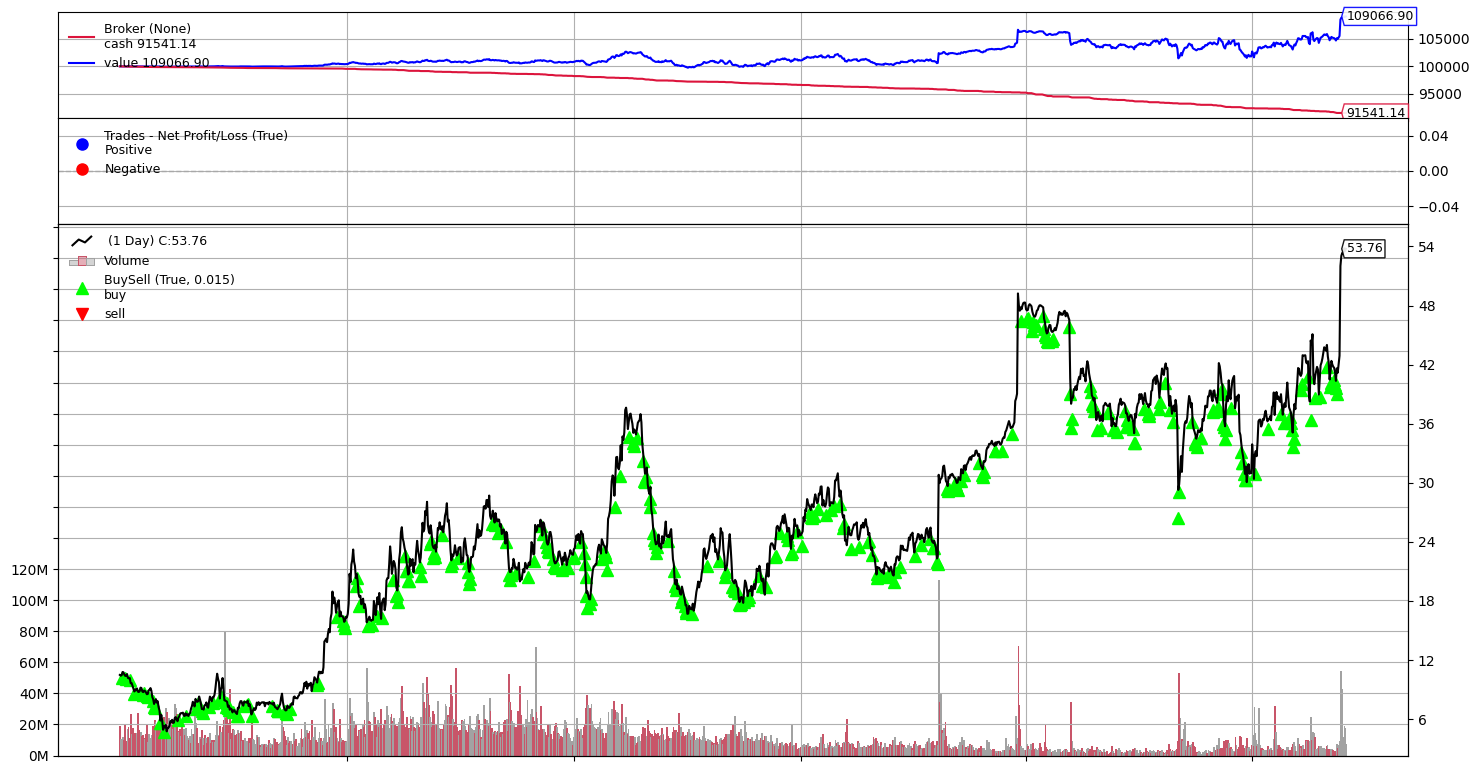

[[<Figure size 1500x800 with 4 Axes>]]

In [139]:

%matplotlib inline
plt.rcParams["figure.figsize"] = (15, 8)
cerebro.plot(iplot=False)